# Case Study on Correlation and Regression



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset to python
data = pd.read_csv("Add_sales_data_2018.csv")

In [3]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
data.shape

(205, 7)

In [5]:
#for checking the null values
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [6]:
#to describe the dataset using measures of central tendency
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [7]:
#finding the correlation between values
data.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

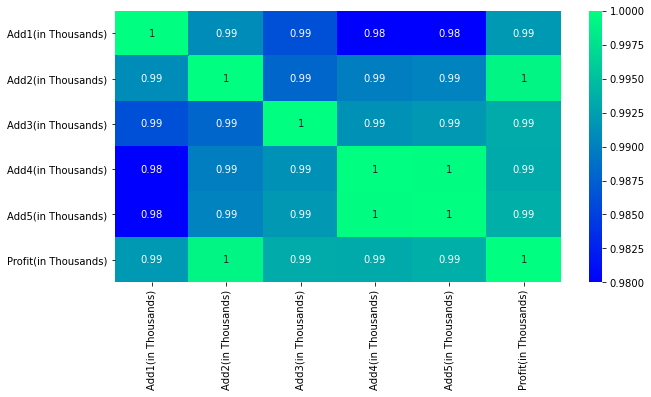

In [8]:
#plotting the correlation matrix
corrmatrix = data.corr()
#using heatmap 
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,vmin = 0.98, vmax = 1, annot= True, cmap='winter')

In [9]:
#all the values are around 1, which shows that there is high correlation with profit.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [10]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [11]:
data1 = data.drop(['Date'],axis=1)

In [12]:
data1.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [13]:
#splitting the datas into dependent and independent variables
y = data1["Profit(in Thousands)"]
X = data1.drop(["Profit(in Thousands)"], axis=1)

In [14]:
X.shape

(205, 5)

In [15]:
y.shape

(205,)

In [17]:
#splitting the dataset into train and test values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [18]:
X_train.shape

(153, 5)

In [19]:
#to build linear regression model
from sklearn import linear_model
lr= linear_model.LinearRegression()

In [20]:
model = lr.fit(X_train,y_train)

In [21]:
predict = model.predict(X_test)

In [22]:
predict

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788, 5038.222,
       5491.792, 5019.997, 4647.356, 4486.38 , 4435.174, 5300.437,
       5425.19 , 4482.183, 4193.095, 6062.457])

In [23]:
#mean square error is present in metrix class
from sklearn.metrics import mean_squared_error

In [25]:
print("The mean squared error is:", mean_squared_error(y_test,predict))

The mean squared error is: 8.11273293080854e-25


In [26]:
#The mean squared error is very close to zero, which means that this model is efficient.

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [27]:
nowpro=[[290,312,309,298,320]]

In [28]:
predpro=model.predict(nowpro)

In [30]:
predpro

array([5820.06])

In [31]:
#the predicted profit for the given value is 5820.06(in thousands)
